In [1]:
import numpy as np
from scipy import optimize
import pandas as pd
from matplotlib import pyplot
data = pd.read_csv('train.csv')
    
'''normalized_data=(data-data.min())/(data.max()-data.min())
normalized_data.fillna(data.mean(), inplace=True)        

X = normalized_data.drop(['label'], axis=1)                       # Normalized 'X' (numpy array)
y = data['label']  '''


"normalized_data=(data-data.min())/(data.max()-data.min())\nnormalized_data.fillna(data.mean(), inplace=True)        \n\nX = normalized_data.drop(['label'], axis=1)                       # Normalized 'X' (numpy array)\ny = data['label']  "

In [20]:
import numpy as np
from scipy import optimize
import pandas as pd

class costing:
    def data_clean(self,data): # 'data' is a pandas dataframe
        
        normalized_data=(data-data.min())/(data.max()-data.min())
        normalized_data.fillna(data.mean(), inplace=True)

        X = normalized_data.drop(['label'], axis=1)                       # Normalized 'X' (numpy array)
        y = data['label']                      # numpy array
        
        return X, y

    def sigmoid(self,z):
        z = np.array(z)
        g=np.zeros(z.shape)
        g=1/(1+np.exp(-z))
        
        return g
    
    # Regularized cost function definition
    def costFunctionReg(self,w,X,y,lambda_):
        m,n = X.shape
        if y.dtype == bool:
            y = y.astype(int)
        h = self.sigmoid(np.dot(X,w.T))
        J = 0
        grad = np.zeros(w.shape)
        loss = np.multiply(-y,np.log(h))-np.multiply(1-y,np.log(1-h))
        
        J =  ((1/m)*np.sum(loss)) + np.sum((lambda_/(2*m))*np.square(w[1:]))           # Cost 'J' should be a scalar
        grad = (1/m)*np.dot(h-y, X) + (lambda_/m)*w         # Gradient 'grad' should be a vector
        
        return J, grad
    
    # Prediction based on trained model
    # Use sigmoid function to calculate probability rounded off to either 0 or 1
    def predictOneVsAll(self,all_w,X,num_labels):        
        
        p = np.array([(self.sigmoid(np.dot(X,all_w.T))).argmax(axis = 1)]).T    # 'p' should be a vector of size equal to that of vector 'y'
        
        return p
    
    # Optimization defintion
    def minCostFun(self, train_data): #'train_data' is a pandas dataframe
        X_train,y_train = self.data_clean(train_data)
        m,n = X_train.shape
        X_train = np.array(X_train)
        y_train = np.array(y_train)
        
        X_train = np.concatenate([np.ones((m,1)),X_train], axis=1)
        lambda_ = 0.1         # Regularization parameter
        iters = 4000
        w_ini =  np.zeros((10,n+1))             # Intialize 'w' for all classes as zero
        all_w =  np.zeros((10,n+1))
        
        for c in np.arange(10) :
            w = w_ini[c]
            options = {'maxiter':iters}
            c1 = (y_train == c)
            opt = optimize.minimize(self.costFunctionReg, w, (X_train,c1,lambda_), jac=True, method= 'CG', options=options)
            all_w[c] =  np.round(opt.x,3)      # Optimized weights (size = 10 X 785) rounded off to 3 decimal places
            
        p = self.predictOneVsAll(all_w,X_train,y_train)
        self.all_w = all_w
        corr_pred = sum(sum(y_train==p.T))
        
        acrcy = np.round(100*corr_pred/m,3)       # Training set accuracy (in %) rounded off to 3 decimal places (Ans ~ 93.2)
        
        return all_w, acrcy
    
    # Calculate testing accuracy
    def TestingAccu(self, test_data): #'test_data' is a pandas dataframe
        
        X,y = self.data_clean(test_data)
        X = np.concatenate([np.ones((y.size,1)),X], axis=1)
        y = np.array(y)
        X = np.array(X)
        #w,acc = self.minCostFun(train_data)
        p = self.predictOneVsAll(self.all_w,X,y)
        
        corr_pred = sum(sum(y==p.T))
        
        acrcy_test = np.round(100*corr_pred/y.size,3)   # Training set accuracy (in %) rounded off to 3 decimal places (Ans ~ 86.667)
        
        return acrcy_test

In [21]:
a = costing()
w,acc = a.minCostFun(data)


In [22]:
np.round(acc,3)

93.23

In [23]:
test_data = pd.read_csv('test.csv')
a.TestingAccu(test_data)

86.667

In [24]:
acc

93.23

In [7]:
def displayData(X, example_width=None, figsize=(3,3)):
    """
    Displays 2D data stored in X in a nice grid.
    """
    # Compute rows, cols
    if X.ndim == 2:
        m, n = X.shape
    elif X.ndim == 1:
        n = X.size
        m = 1
        X = X[None]  # Promote to a 2 dimensional array
    else:
        raise IndexError('Input X should be 1 or 2 dimensional.')

    example_width = example_width or int(np.round(np.sqrt(n)))
    example_height = n / example_width

    # Compute number of items to display
    display_rows = int(np.floor(np.sqrt(m)))
    display_cols = int(np.ceil(m / display_rows))

    fig, ax_array = pyplot.subplots(display_rows, display_cols, figsize=figsize)
    fig.subplots_adjust(wspace=0.025, hspace=0.025)

    ax_array = [ax_array] if m == 1 else ax_array.ravel()

    for i, ax in enumerate(ax_array):
        ax.imshow(X[i].reshape(example_width, example_width, order='F'),
                  cmap='Greys', extent=[0, 1, 0, 1])
        ax.axis('off')

In [15]:
descr = ['T-Shirt/Top','Trouser','Pullover','Dress','Coat','Sandals','Shirt','Sneaker','Bag','Ankle Boots']

[0 9 4 3 1 3]


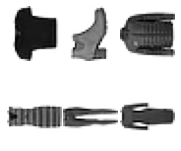

In [19]:
#a = costing()
#w,acc = a.minCostFun(data)
num_labels = [descr[i] for i in range(10)]
#train_data = pd.read_csv('train.csv')
#X,y = a.data_clean(train_data)
#y = np.array(y)
#X = np.array(X)
#m,n = X.shape

rand_indices = np.random.choice(m, 6, replace=False)

sel = X[rand_indices, :]
print(y[rand_indices])

displayData(sel)


In [17]:
a = costing()
w,acc = a.minCostFun(data)
num_labels = [i for i in range(10)]
test_data = pd.read_csv('test.csv')
X,y = a.data_clean(test_data)
X_test = np.concatenate([np.ones((m,1)),X], axis=1)
y_pred = a.predictOneVsAll(w,X_test,num_labels)   # predicted labels
y_pred = np.array(y_pred)
X = np.array(X)
m,n = X.shape

rand_indices = np.random.choice(m, 6, replace=False)

sel = X[rand_indices, :]
print(y_pred[rand_indices].T)

displayData(sel)



KeyboardInterrupt: 

In [ ]:
data

In [4]:
a = costing()
X_train,y_train = a.data_clean(data)
m,n = X_train.shape
X_train = np.array(X_train)
y_train = np.array(y_train)
X_train = np.concatenate([np.ones((m,1)),X_train], axis=1)
w_ini =  np.zeros((10,n+1))           
all_w =  np.zeros((10,n+1))
J = []
for c in np.arange(10) :
    w = w_ini[c]
    options = {'maxiter':4000}
    c1 = (y_train == c)
    opt = optimize.minimize(a.costFunctionReg, w, (X_train,c1,0.1), jac=True, method= 'CG', options=options,callback=log_cost)
    J.append(opt.fun)

In [6]:
  


J_his

array([0.06842424, 0.06842424, 0.06842424, ..., 0.01488135, 0.01488135,
       0.01488135])

In [3]:
cost_values=[]
def log_cost(x):
  cost_values.append(J)

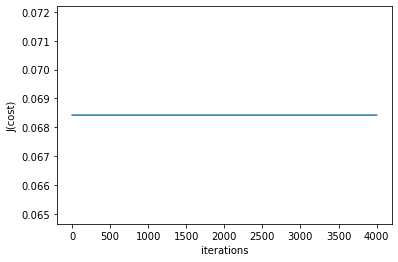

In [5]:



J_his = (np.ndarray.flatten(np.array(cost_values).T))
for i in range(1,2):
    y = J_his[5084*(i-1):5084*(i-1)+4000]
    x = [ j for j in range(4000) ]
    pyplot.plot(x,y)
    #pyplot.legend(['Feature',i])
    pyplot.xlabel('iterations')
    pyplot.ylabel('J(cost)')

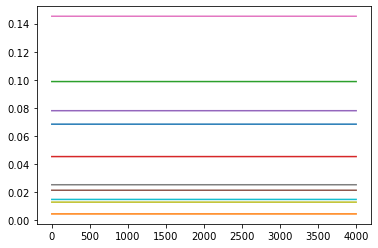

In [9]:
cost_values = []
a = costing()
X_train,y_train = a.data_clean(data)
m,n = X_train.shape
X_train = np.array(X_train)
y_train = np.array(y_train)
X_train = np.concatenate([np.ones((m,1)),X_train], axis=1)
w_ini =  np.zeros((10,n+1))           
all_w =  np.zeros((10,n+1))
J = []
for c in np.arange(10) :
    w = w_ini[c]
    options = {'maxiter':4000}
    c1 = (y_train == c)
    opt = optimize.minimize(a.costFunctionReg, w, (X_train,c1,0.1), jac=True, method= 'CG', options=options,
                                                                                                callback=log_cost)
    J.append(opt.fun)

def log_cost(x):
  cost_values.append(J)
J_his = (np.ndarray.flatten(np.array(cost_values).T))
for i in range(1,11):
    y = J_his[5084*(i-1)+40:5084*(i-1)+4040]
    x = [j for j in range(4000)]
    pyplot.plot(x,y)

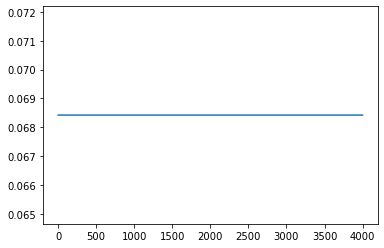

In [13]:
J_his[0] = 0.19
for i in range(1,2):
    y = J_his[5084*(i-1)+40:5084*(i-1)+4040]
    x = [j for j in range(4000)]
    pyplot.plot(x,y)